In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

Original Image


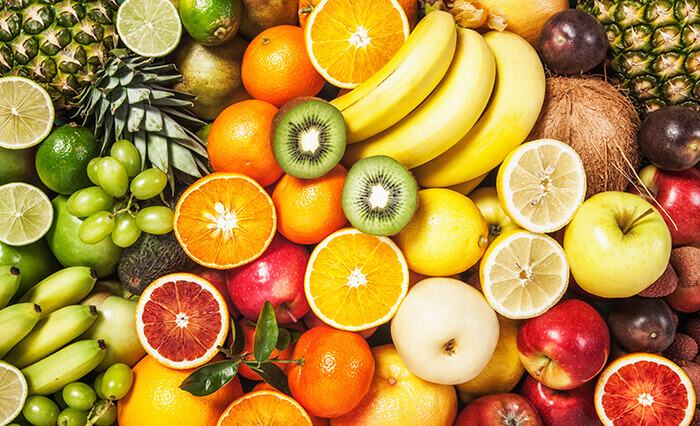

Color detected: red


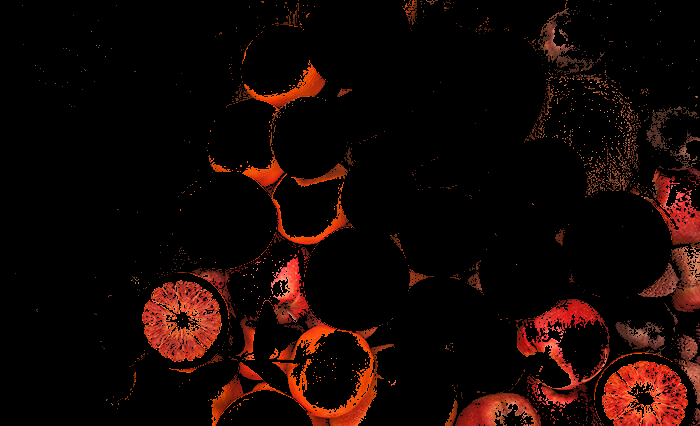

Color detected: red


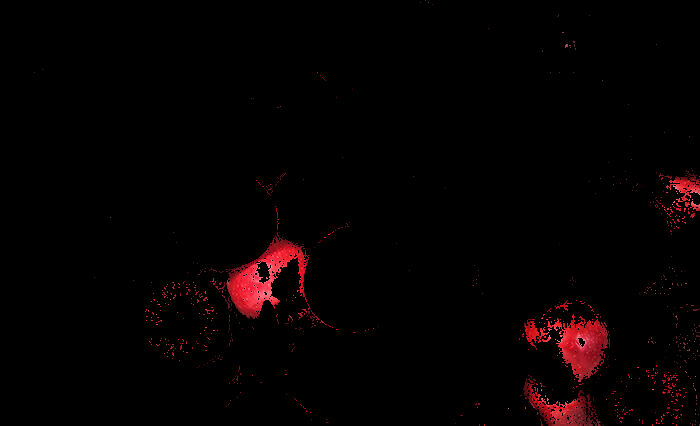

Color detected: green


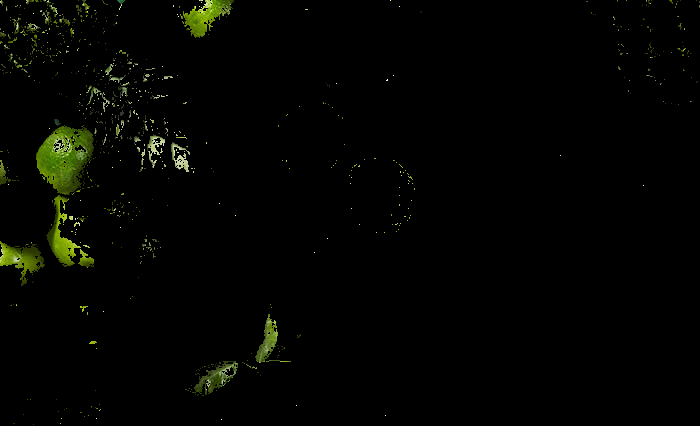

Color detected: blue


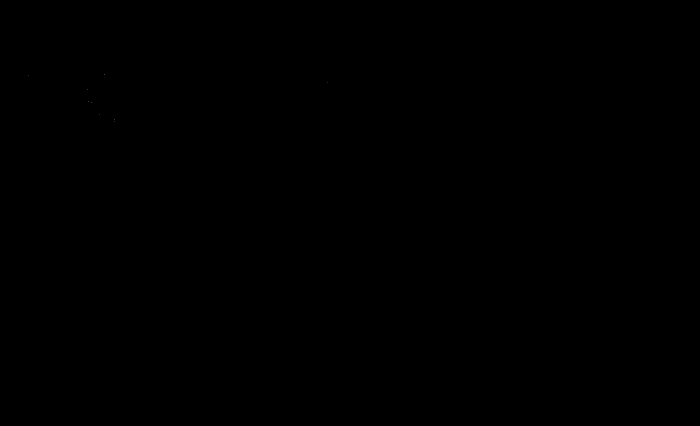

In [ ]:
# Load the image
image = cv2.imread("fruit.jpg")  # Ensure the correct path
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# Define HSV color ranges
color_ranges = [
    [(0, 120, 70), (10, 255, 255), "red"],    # Red (Lower range)
    [(170, 120, 70), (180, 255, 255), "red"], # Red (Upper range)
    [(36, 50, 50), (89, 255, 255), "green"],  # Green
    [(90, 50, 50), (130, 255, 255), "blue"]   # Blue
]
print("Original Image")
cv2_imshow( image)
# Iterate through color ranges and create masks
for lower, upper, color in color_ranges:
    mask = cv2.inRange(hsv, np.array(lower), np.array(upper))
    # Check if the mask is not empty
    if cv2.countNonZero(mask) > 0:
        result = cv2.bitwise_and(image, image, mask=mask)
        print(f"Color detected: {color}")
        cv2_imshow(result)

Level 0:


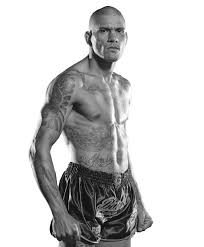

Level 1:


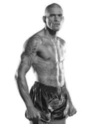

Level 2:


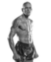

Level 3:


Level 4:


In [ ]:
image = cv2.imread('alex.jpeg', cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if image is None:
    print("Error: Image not found!")
    exit()

# Create an image pyramid
pyramid = [image]
for _ in range(4):
    image = cv2.pyrDown(image)
    pyramid.append(image)

# Display the pyramid levels
for i, img in enumerate(pyramid):
    print(f"Level {i}:")
    cv2_imshow(img)

Original Image


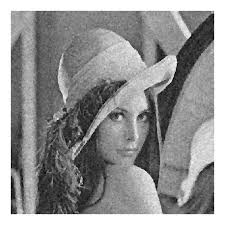

Gaussian Blur


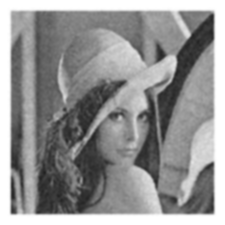

In [ ]:
image = cv2.imread('Smoothing.jpeg')
# Check if the image is loaded correctly
if image is None:
    print("Error: Image not found!")
    exit()
# Apply different smoothing techniques
gaussian = cv2.GaussianBlur(image, (5, 5), 0)  # Gaussian Blurrin
# Display original and smoothed images
print("Original Image")
cv2_imshow(image)  # Original Image
print("Gaussian Blur")
cv2_imshow(gaussian)  # Gaussian Blur

orginal image


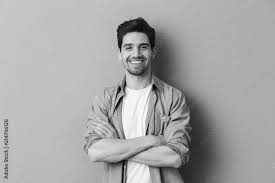

sobel x


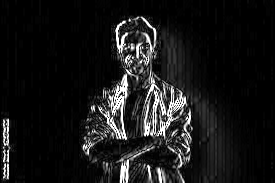

sobel y


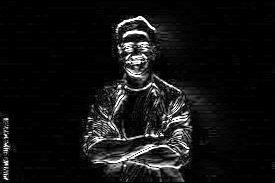

sobel combined


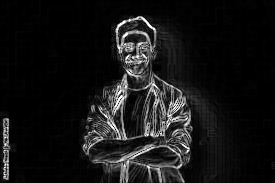

In [ ]:
# Load the image in grayscale
image = cv2.imread('man.jpeg', cv2.IMREAD_GRAYSCALE)
# Apply Sobel edge detection in X and Y directions
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in X direction
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in Y direction
# Convert to absolute values
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)
# Combine X and Y gradients
sobel_combined = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)
# Display results
print("orginal image")
cv2_imshow( image)
print("sobel x")
cv2_imshow( sobel_x)
print("sobel y")
cv2_imshow(sobel_y)
print("sobel combined")
cv2_imshow(sobel_combined)

Face Detection Result:


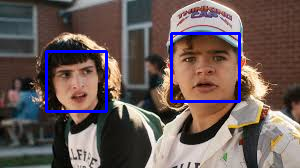

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
image = cv2.imread("stranger.jpeg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

print("Face Detection Result:")
cv2_imshow(image)
